<h1>Find the line that best fits a data set using Least Squares Regression</h1>

<hr>

<h2>Table of contents</h2>

1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Results](#results)
5. [Conclusion](#conclusion)

<h2>1. Introduction</h2><a name="introduction"></a>

Linear Regression is a statistical method that helps us understand the relationship between 2 variables. The independent variable "x" and the dependent variable "y". The linear relationship between these two variables is define in the followin equation:

$$ y = a + bx $$

where:
<br>
 a: is the intercept  
 b: is the slope

With these equation and with our data set we can train our Linear Regression model.

To find the parameters "a" and "b" and thus find the Linear Regression function that best fits our data set, we use the mathematical method called Least Squares Regression. This method helps us minimize the squared sum of the error, which is the difference (di) on the Y-axis between the observed value of our data and the predicted value of our training model.

To calculate the sum of the error we use the Quadratic Loss Function, which can be defined as follows: 


$$\hat{S} = \sum \limits _{i=1} ^{n} (y_{i}-\hat{y}_{i})^2 $$

The following image shows a Linear Regression function and the error (di) between the predicted value and the observed value. 


<img src="linear_regression.png" width="400">



Once we know how to calculate the error, we have to minimize it. And for it, we have to find the partial derivative of S and to equalize it to 0. In this way we are finding the minimum value that our error can reach. 

Doing this partial derivation with respect to a and b, we will obtain the equations that will allow us to obtain the values of the parameters. With these values we can create the final model and we will be ready to predict the values that we do not have and we want to know.

In our case, to obtain the most representative parameter we will repeat this process many times with the Bootstrap function using many samples from our data set. After repeating the process, we are going to obtain a set of parameters for the intercept (b) and for the slope (a), which will be averaged to obtain the parameters that best fit our data. These will be the parameters that we will use in our final model.

To create the samples or mini-datasets from our dataset, we will use the Random function of the Numpy library, which selects random data from the original dataset and creates samples with n elements. 

Finally, to determine how well the data set fits the linear regression model and how well it makes a prediction, we use the coefficient of determination. This coefficient, better known as R-square, is the most commonly used statistical measure for this calculation. Its measure goes between 0 and 1, where 1 means that the model is very good because it predicts 100% of the variance of the data; and 0, on the other hand, means that the model is very bad because it is not capable of predicting the variance of the data.



<h2>2. Data</h2><a name="data"></a>

The data was obtained from a simulation. 

<h2>3. Methodology</h2><a name="methodology"></a>

The first thing we do is import the Numpy and Pandas library, for data analysis, and create a function to open our dataset.

After that, we create: the Linear Regression function to find the parameters "a" and "b", the Random function to create a mini-random data set from our data set, and the Bootstrap function to sample our data many times.



<h3>3.1 Import Libraries</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



<h3>3.2 Create a function to open our file</h3>

This function reads a file with two columns, which are expected to be separated by a space.
<h4>Parameters</h4>

    file_name: string (e.g. '/Users/mpaz/archivo.dat')
     
<h4>Returns </h4>
     
    x: np.array
     Array with the values of the first column.
    y: np.array
     Array with the values of the second column.

In [2]:
def reed_data(file_name):
    x,y = [],[]
    with open(file_name, "r") as file:
        i = 0
        for line in file:
            col1, col2 = line.split()
            x.append(float(col1))
            y.append(float(col2))
    
    return np.array(x),np.array(y)
    return np.array(x),np.array(y)



<h3>3.3 Define the function to find the a and b coefficients of the Lineal Regression  </h3>

This function adjusts a least square regression curve and returns the values of a and b


    Parameters
    -----------
    x: np.array
    Array with the values of x.
    y: np.array
    Array with the values of y.

    Returns
    -------
    a: float
    Slope of the function

    b: float
    Interception point with the y-axis of the min-square function



In [3]:
def lineal_regression(x,y):

    n=len(x)
    b = ((sum(y) * sum(x ** 2)) - (sum(x * y) * sum(x))) / (n * sum(x ** 2) - (sum(x) * sum(x)))
    a = (sum(y) - n * b) / (sum(x))

    return a,b

<h3>3.4 Create function Random</h3>

This function returns the array "xn" and "xy" with a set of n values. These values are randomly extracted from the x and y lists, according to the array you want to calculate.


<h4>Parameters</h4>
     
    x: np.array
     Array with the values of the first column.
    y: np.array
     Array with the values of the second column.

<h4>Returns</h4>
     
    xn: array
     Array containing the n values that were randomly taken from list x
    yn: array
     Array containing the n values that were randomly taken from list y

     

In [4]:
def Random_n(x,y):

    I=np.arange(N)
    idx=np.random.choice(I,n,replace=False)
    xn=x[idx]
    yn=y[idx]

    return xn,yn

<h3>3.4 Define the function Bootstrap  </h3>

This function will resample our data set many time.

In [5]:
def Bootstrap(x,y,n,M,plot_line=True):
    aa, bb = [], []
    for i in range(M):
        xi,yi = Random_n(x, y)
        ai,bi = lineal_regression(xi,yi)
        c=ai*x+bi

        aa.append(ai)
        bb.append(bi)

        if plot_line:
            plt.plot(x,c,'-',color='cornflowerblue',alpha=0.05,zorder=2)
    plt.show()

    return aa,bb

<h2>4. Results</h2><a name="results"></a>

In [6]:
# First, we define the name of the file from which we are going to extract the N data:

file_name= "/Users/mpaz/Desktop/data.dat"

# Read the data:

x,y= reed_data(file_name)

# Fit a line to the data:
a,b = lineal_regression(x,y)

# Define the values for the Bootstrap:
N=len(x)
n=10
M=10000

# create mini lists xn, yn representing the random samples of the N of x,y.
xn,yn= Random_n(x,y)


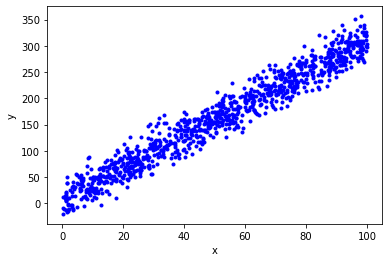

In [7]:
# See the data

plt.plot(x,y,'.',mfc = 'blue',mec='blue',zorder=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

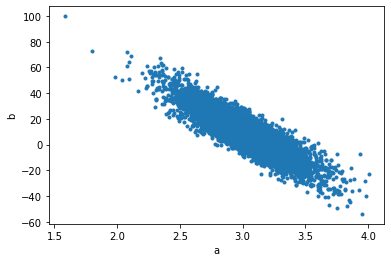

In [8]:
# See correlation between a and b

aa,bb = Bootstrap(x,y,n,M,plot_line=False)

plt.plot(aa,bb, ".")
#plt.xlim(-10,15)
#plt.ylim(-10,15)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

In [9]:
# Calculate the average of the parameters to obtain the final parameter

print "The parameter a is equal to: " ,sum(aa)/len(aa), "and the parameter b is equal to", sum(bb)/len(bb)


SyntaxError: invalid syntax (<ipython-input-9-006d34052d8e>, line 3)

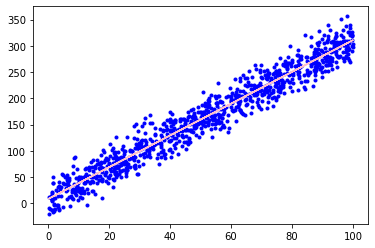

In [10]:
# Linear regression
A= sum(aa)/len(aa)
B= sum(bb)/len(aa)
Y_pred = A*x + B

plt.plot(x,y,'.',mfc = 'blue',mec='blue',zorder=3)
plt.plot(x, A*x + B, zorder = 4, color="pink")
plt.show()

In [11]:
# r_squared

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9506061279230157


<h2>5. Conclusion</h2><a name="conclusion"></a>

Using Least Square Regression is the best method to find a linear regression in the data set and if you want to be more accurate you can use the Random and Bootstrap function to get the best parameter for your model.

In our case, the R-square is 0.95 which means that our linear regression model fits very well with our data set because is close to 1. But it is important to know that even though the r-square measure is the most used, it is not the best opction for this calculation. The best is to use Cross-validation, which is a technique that measures the complexity of the models and gives us a much better prediction error.
